In [1]:
import intake
cat = intake.open_catalog("../catalog.yaml")

In [2]:
run = cat.ICON["ngc2009"]

In [3]:
data = run.oce_200m_atmgrid.to_dask()
grid = cat.ICON.grids[data.uuidOfHGrid].to_dask()

In [4]:
import numpy as np
from scipy.interpolate import NearestNDInterpolator

In [6]:
model_lon = np.rad2deg(grid.clon.values)
model_lat = np.rad2deg(grid.clat.values)
model_lon = np.where(model_lon>180, model_lon-360, model_lon)

In [22]:
lon = np.linspace(-30, 60, 90*10)
lat = np.linspace(33, 72, (72-33)*10)
lon2, lat2 = np.meshgrid(lon, lat)

points = np.vstack((model_lon, model_lat)).T
data_sample = data['to'].isel(time=1).isel(depth_full=0)

nn_interpolation = NearestNDInterpolator(points, data_sample.values)
interpolated_nn = nn_interpolation((lon2, lat2))

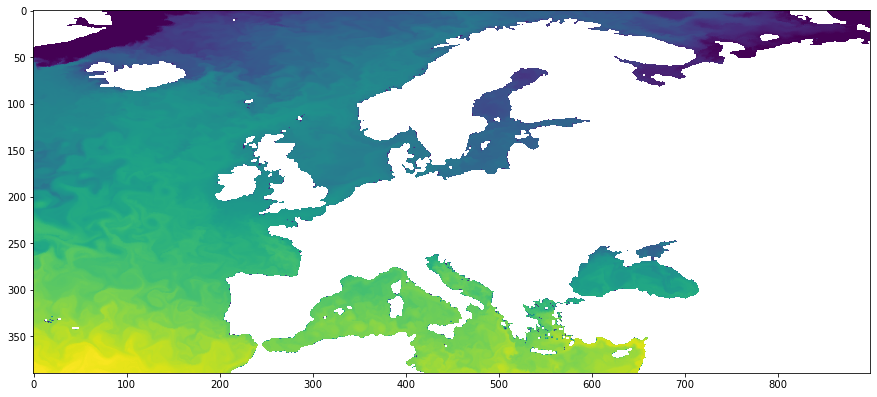

In [23]:
import matplotlib.pylab as plt
plt.figure(figsize=(15,15))
plt.imshow(np.flipud(interpolated_nn))